# Bike Sharing Assignment

Problem Statement: A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
bike = pd.read_csv('day.csv')

## Step 1: Reading, Understanding and Visualising Data

In [3]:
#Let's explore the top 5 rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Print shape
print(bike.shape)

(730, 16)


In [5]:
# Print Information
print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB
None


In [6]:
#Print data type
print(bike.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning Begin:

In [8]:
# Identify duplicate rows in dataset based on instant column
print(bike.duplicated(subset=None, keep='first').count())
duplicate=bike[bike.duplicated(['instant'])]
duplicate

#Observed no duplicate rows in bike sharing dataset

730


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [9]:
# Identify how many rows have all missing values
print('Number of empty Rows:')
print(bike.isnull().all(axis=1).sum())
# Identified: There are no empty rows in whole dataset.

# Identify how many columns have all missing values
print('Number of empty Columns:')
print(bike.isnull().all(axis=0).sum())
# Observed: There are no columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
0


In [10]:
# Identify if there are any columns that have only a single value 
pd.Series({col:bike[col].unique() for col in bike})

# There are no columns with single value in dataset

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                            [2, 1, 3]
temp          [14.110847, 14.902598, 8.050924, 8.2, 9.305237...
atemp         [18.18125, 17.68695, 9.47025, 10.6061, 11.4635...
hum           [80.5833, 69.6087, 43.7273, 59.0435, 43.6957, ...
windspeed     [10.749882, 16.652113, 16.636703, 10.739832, 1...
casual        [331, 131, 120, 108, 82, 88, 148, 68, 54, 41, ...
registered    [654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...
cnt           [985, 801, 1349, 1562, 160

In [11]:
#Drop the columns which are not useful in further Analysis.
bike = bike.drop(['atemp','casual','registered','instant','dteday'],axis = 1)

# atemp is dropped as it is feel like temp and it will have high correlation with temp
# The sum of casual and registered is count (cnt). So we can drop both of these columns.
# instant column can be dropped as it is just a row instance identifier
# dteday can be removed as we have mnth, year and weekday already in the dataset. However 01/01/2018 
# is Monday that we will use while converting weekday to categorical.

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [13]:
# Convert the applicable rows to categorical types

bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'clear',2:'mist',3:'lightrain',4:'heavyrain'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'january',2: 'february',3: 'march',4: 'april',5: 'may',6: 'june',
                  7: 'july',8: 'august',9: 'september',10: 'october',11: 'november',12: 'december'})

bike.weekday = bike.weekday.replace({0: 'tuesday',1: 'wednesday',2: 'thursday',3: 'friday',4: 'saturday',5: 'sunday',6: 'monday'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,monday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,january,0,tuesday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,43.6957,12.522300,1600


### Univariate Analysis:

In [14]:
# Basic statistics with .describe() - Quantitative Variables
bike['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

<AxesSubplot:xlabel='cnt'>

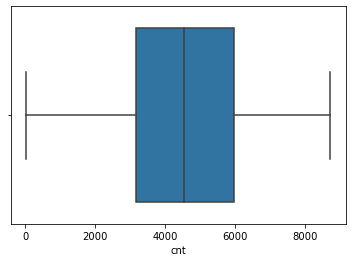

In [15]:
#Univariate analysis using Box Plot on Bike Count.
sns.boxplot(bike.cnt)
#Observation:
#For bike count interquantile range lies between 3000 to 6000. Also there are no outliers.

In [16]:
# Basic statistics with .describe() - Quantitative Variables
bike['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

<AxesSubplot:xlabel='temp'>

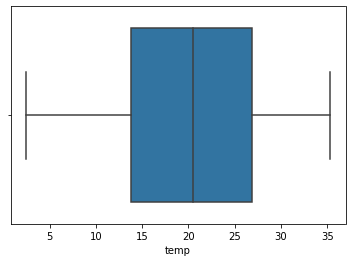

In [17]:
#Univariate analysis using Box Plot on Temperature.
sns.boxplot(bike.temp)
#Observation:
#For temperature there are no outliers

In [18]:
# Basic statistics with .describe() - Quantitative Variables
bike['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

<AxesSubplot:xlabel='hum'>

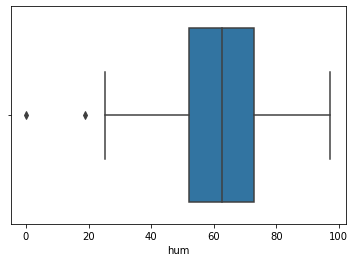

In [19]:
#Univariate analysis using Box Plot on Humidity.
sns.boxplot(bike.hum)
#Observation:
#For humidity interquantile range lies between 50 to 70 approx. There is no need for outlier treatment

In [20]:
# Basic statistics with .describe() - Quantitative Variables
bike['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

<AxesSubplot:xlabel='windspeed'>

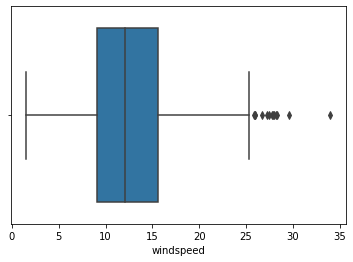

In [21]:
#Univariate analysis using Box Plot on Windspeed.
sns.boxplot(bike.windspeed)
#Observation:
#For Windspeed interquantile range lies between 8 to 16.

## Bivariate Analysis

### Continuous vs Continuous

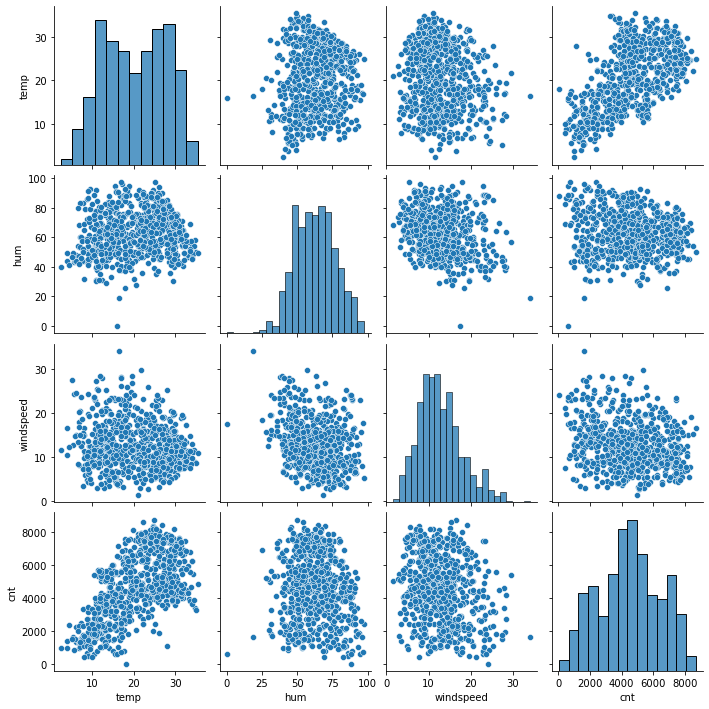

In [22]:
#Scatter Plot for numerical variables
bike_num = bike.iloc[:,7:]
bike_num
sns.pairplot(bike_num)
plt.show()
#Observation
#The scatter plot shows that there is linear relationship for atlease some of the variables.
#So we can conclude that Linear regression is the correct approach for this problem

### Categorical vs Continuous

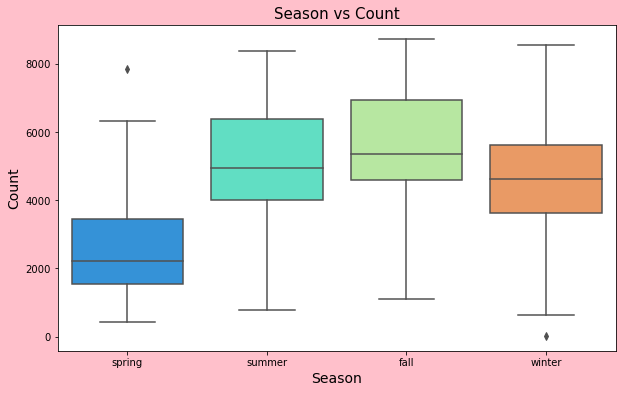

In [23]:
# Bivariate Analysis - Season vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='season', data =bike,palette='rainbow')
ax.set_title('Season vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Season',fontsize=14,color = 'black')
plt.show()

# Observations:
# During Spring season the bike demand is lowest
# The median bike demand is high and almost similar for summer and fall

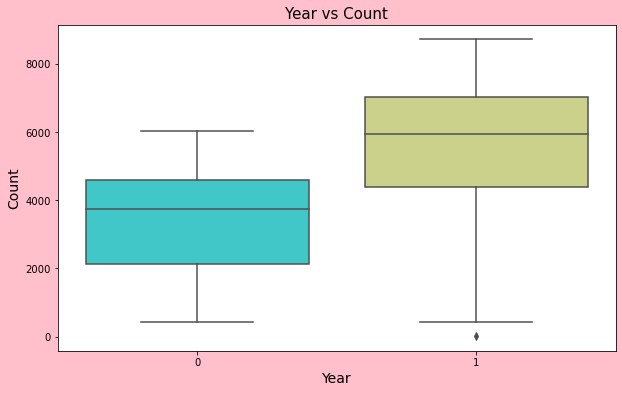

In [24]:
# Bivariate Analysis - Year vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='yr', data =bike,palette='rainbow')
ax.set_title('Year vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Year',fontsize=14,color = 'black')
plt.show()

# Observations:
# The bike demand has increased in 2019 as compared to 2018


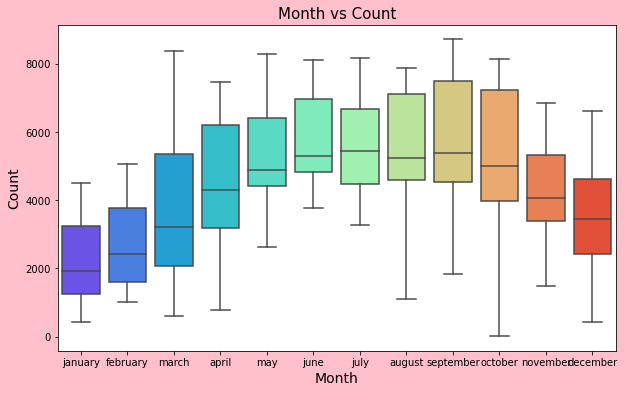

In [25]:
# Bivariate Analysis - Month vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='mnth', data =bike,palette='rainbow')
ax.set_title('Month vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Month',fontsize=14,color = 'black')
plt.show()

# Observations:
# The demand for bikes increases from January till June and then remains constant and decreases
# from October to December

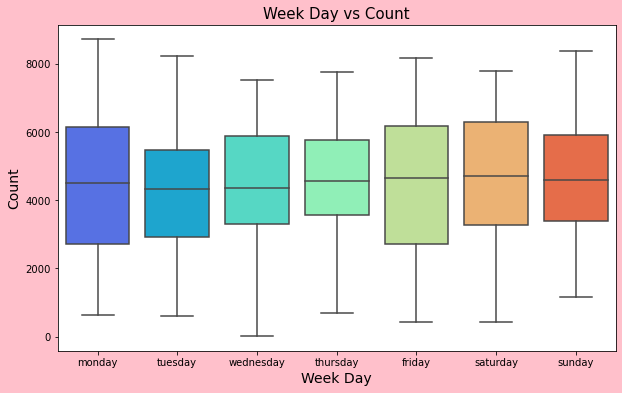

In [26]:
# Bivariate Analysis - Week Day vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='weekday', data =bike,palette='rainbow')
ax.set_title('Week Day vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Week Day',fontsize=14,color = 'black')
plt.show()

# Observations:
# There is no impact of Weekdays on the demand for bikes

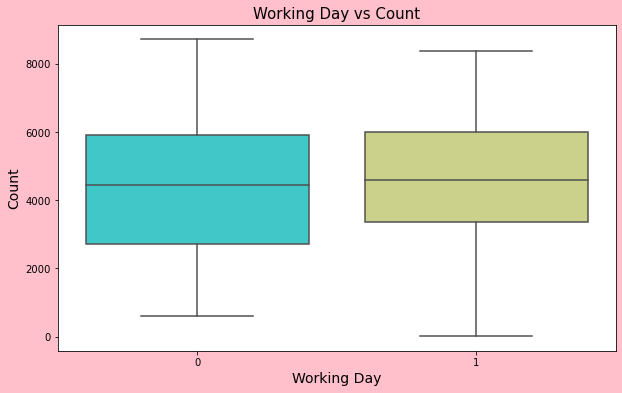

In [27]:
# Bivariate Analysis - Working Day vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='workingday', data =bike,palette='rainbow')
ax.set_title('Working Day vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Working Day',fontsize=14,color = 'black')
plt.show()

# Observations:
# Working day or holiday has no impact on the demand for bikes

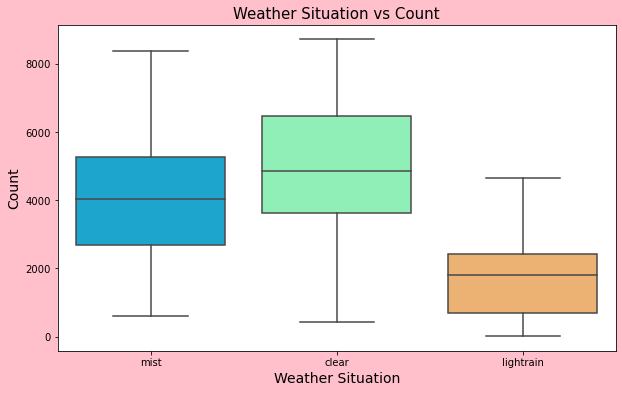

In [28]:
# Bivariate Analysis - Weather Situation vs Count
# Box Plot

plt.figure(figsize=(10,6),facecolor='pink')
ax = sns.boxplot(y='cnt', x='weathersit', data =bike,palette='rainbow')
ax.set_title('Weather Situation vs Count',fontsize=15,color='black')
ax.set_ylabel('Count',fontsize=14,color = 'black')
ax.set_xlabel('Weather Situation',fontsize=14,color = 'black')
plt.show()

# Observations:
# The demand for bike significantly decreases when there is light rain

## Multivariate Analysis

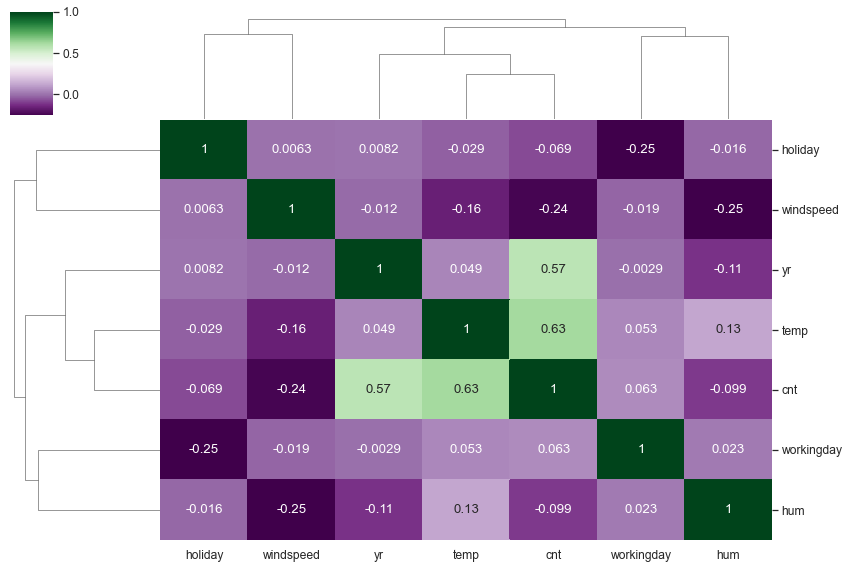

In [29]:
# Heatmap with Dendogram(clustermap) to show closeness among important numerical variables.

bike_feature_correlation = bike.corr()
sns.set(font_scale=1.1)
sns.clustermap(bike_feature_correlation,annot=True,figsize=(12, 8),cmap="PRGn")
plt.show()

#Observations:
# Temperature has high correlation with the bike demand (cnt)
# Year has also high correlation with bike demand
# Windspeed has a highly negative correlation with bike demand
# Working day and holiday have strong negative correlation which is expected

## Step 2: Preparing the Data for modelling

### Dummy Variables

In [30]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Print columns after creating dummies
# As the dataset doesnot have any data related to Heavy Rain (weathersit) so value 0 for 'weathersit_lightrain' 
# and 'weathersit_mist' would mean Clear (weathersit)
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'mnth_september', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_lightrain', 'weathersit_mist'],
      dtype='object')

In [32]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Splitting

Here, we will split the data into 2 parts
1. Train Data (On which model will be build and is almost 70% of total data)
2. Test Data (On which build model will be tested and is almost 30% of total data)

In [33]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Numeric Data

In [34]:
# Rescaling should be done only on the numerical variables and not on the categorical types
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Training the Model

In [36]:
#Build a model with all variables
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.00e-181
Time:                        13:07:28   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2409      0.036      6.786      0.000       0.171       0.311
yr                       0.2324      0.008     28.819      0.000       0.217       0.248
holiday                  0.0067      0.024      0.278      0.781      -0.041       0.054
workingday               0.0929      0.012      7.707      0.000       0.069       0.117
temp                     0.4454      0.046      9.628      0.000       0.354       0.536
hum                     -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed               -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring           -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer            0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter            0.1076      0.028      3.853      0.000       0.053       0.163
mnth_august              0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_december           -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_february           -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_january            -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_july               -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_june                0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_march               0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_may                 0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_november           -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_october             0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_september           0.0859      0.032      2.692      0.007       0.023       0.149
weekday_monday           0.0978      0.014      7.231      0.000       0.071       0.124
weekday_saturday        -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_sunday           0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_thursday        -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_tuesday          0.0435      0.014      3.173      0.002       0.017       0.070
weekday_wednesday       -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_lightrain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_mist         -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.84

In [37]:
# Find the VIF values of all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,86.77
20,weekday_monday,19.71
24,weekday_tuesday,18.34
6,season_spring,10.75
8,season_winter,9.44
7,season_summer,8.27
3,temp,7.08
17,mnth_november,6.79
18,mnth_october,6.47
9,mnth_august,6.36


Now from the p-values and VIF above it is very difficult to drop the columns one by one and reach at a optimal model. So we will use RFE method for model building 

### RFE

In [38]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
# Provide ranking to the features of the model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_august', False, 17),
 ('mnth_december', False, 8),
 ('mnth_february', False, 9),
 ('mnth_january', False, 6),
 ('mnth_july', True, 1),
 ('mnth_june', False, 18),
 ('mnth_march', False, 15),
 ('mnth_may', False, 10),
 ('mnth_november', False, 7),
 ('mnth_october', False, 16),
 ('mnth_september', True, 1),
 ('weekday_monday', False, 4),
 ('weekday_saturday', False, 19),
 ('weekday_sunday', False, 14),
 ('weekday_thursday', False, 13),
 ('weekday_tuesday', False, 11),
 ('weekday_wednesday', False, 12),
 ('weathersit_lightrain', True, 1),
 ('weathersit_mist', False, 3)]

In [41]:
# Select only the columns which will be used for building the model and store it in col variable
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_july', 'mnth_september', 'weathersit_lightrain'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [42]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [43]:
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model
lm_1 = sm.OLS(y_train, X_train_rfe_sm).fit()

In [45]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.79e-186
Time:                        13:07:29   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2682 

In [46]:
# Verify if the columns in X_train_rfe is as per that used to build the model
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_july', 'mnth_september', 'weathersit_lightrain'],
      dtype='object')

In [47]:
# Find the VIF values of all the features in X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#VIF value is high for 'hum' and 'temp'. However the p-values are in acceptable range. 
#So as the next step we will drop 'hum' and look for the p and VIF values.

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,season_summer,1.76
6,season_winter,1.68
7,mnth_july,1.55
8,mnth_september,1.29
9,weathersit_lightrain,1.09
1,holiday,1.04


### Model 2

In [48]:
# Drop the 'hum' column from dataset
X_train_rfe_hum = X_train_rfe.drop(['hum'], axis = 1)
X_train_rfe_hum.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_july,mnth_september,weathersit_lightrain
576,1,0,0.815169,0.264686,0,0,1,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0
111,0,0,0.345824,0.380981,1,0,0,0,0


In [49]:
# Adding a constant variable 
X_train_rfe_hum_sm = sm.add_constant(X_train_rfe_hum)

# Running the linear model
lm_2 = sm.OLS(y_train, X_train_rfe_hum_sm).fit()

# Summary of the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.42e-171
Time:                        13:07:29   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0840 

In [50]:
# Find the VIF values of all the features in X_train_rfe_hum
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_hum.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_hum.values, i) for i in range(X_train_rfe_hum.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#VIF value is in acceptable range for all the features. 
#However the p-values is more than 0.05 for mnth_july. 
#So as the next step we will drop 'mnth_july' and look for the p and VIF values.

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,season_summer,1.75
6,mnth_july,1.51
5,season_winter,1.43
7,mnth_september,1.28
8,weathersit_lightrain,1.06
1,holiday,1.03


### Model 3

In [51]:
# Drop the 'mnth_july' column from dataset
X_train_rfe_july = X_train_rfe_hum.drop(['mnth_july'], axis = 1)
X_train_rfe_july.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_september,weathersit_lightrain
576,1,0,0.815169,0.264686,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0
111,0,0,0.345824,0.380981,1,0,0,0


In [52]:
# Adding a constant variable 
X_train_rfe_july_sm = sm.add_constant(X_train_rfe_july)

# Running the linear model
lm_3 = sm.OLS(y_train, X_train_rfe_july_sm).fit()

# Summary of the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          9.22e-172
Time:                        13:07:29   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0875 

In [53]:
# Find the VIF values of all the variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_july.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_july.values, i) for i in range(X_train_rfe_july.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif



,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.34
6,mnth_september,1.20
7,weathersit_lightrain,1.06
1,holiday,1.03


As the p-values and less than 0.05 and VIF is less than 5 for all the Features we can stop here and do not build any further models. The next step would to perform Residual Analysis.

## Step 4: Residual Analysis of the Train Data

In [54]:
y_train_pred = lm_3.predict()

<AxesSubplot:xlabel='cnt', ylabel='Density'>

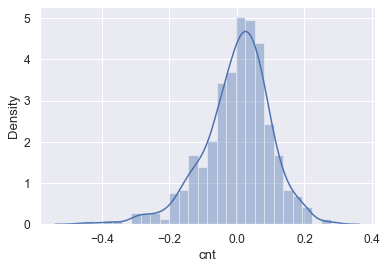

In [55]:
#Plot the residual graph to understand the distribution of error between y_train and y_train_pred
res = y_train - y_train_pred
sns.distplot(res)

# From the below plot we can see that the errors are normally distributed around zero. 
# So our assumption of using linear regression model holds good.

Text(0.5, 0, 'Year')

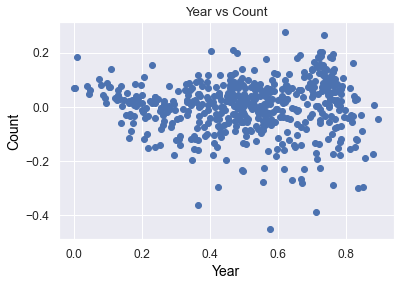

In [56]:
# Test for Homoscedasticity
plt.scatter(y_train_pred, res)
plt.title('Year vs Count')
plt.ylabel('Count',fontsize=14,color = 'black')
plt.xlabel('Year',fontsize=14,color = 'black')
# From the plot below we can see that the points have almost equal variance. 
# The variance is less at the beginning of the dataset and large thereafter. 
# However we cannot see any pattern from which we can conclude it to be heteroscedastic.
# So we can assume the data set is Homoscedastic.

## Step 5: Prediction and Analysis on Test Data

In [57]:
# Rescaling should be done only on the numerical variables similar to train set

num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_october,mnth_september,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_lightrain,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Divide the dataset to X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
#Drop the variables from test set that were dropped from train set
X_test_new = X_test.drop([ 'workingday', 'hum',
       'season_spring', 'mnth_august',
       'mnth_december', 'mnth_february', 'mnth_january', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november', 'mnth_october',
       'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_mist'], axis = 1)

In [61]:
#Add a constant to the dataset
X_test_new = sm.add_constant(X_test_new)

In [62]:
# Predict
y_test_pred = lm_3.predict(X_test_new)

In [63]:
#Evaluate the model
r2_score(y_true = y_test,y_pred=y_test_pred)

# As the variation of r2 between train and test set is less than 5% we can assume that the model is 
# well optimised

0.7720731949554799

Text(0, 0.5, 'y_pred')

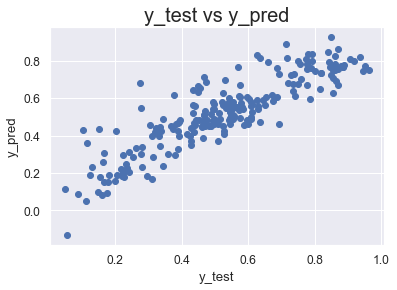

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test')
plt.ylabel('y_pred')

<AxesSubplot:ylabel='Density'>

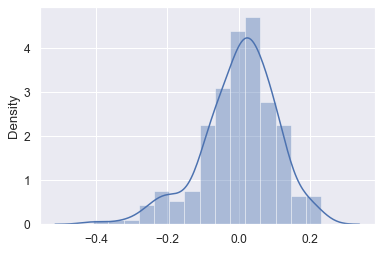

In [65]:
res = y_test - y_test_pred
sns.distplot(res)

Conclusion: From the above two plots we can conclude that the errors of the test data are normally distributed. So the derived model can be considered as a decent model.

The equation of best fitted line is mentioned below:

count = 0.0875 + 0.2334 * year + 0.5682 * temperature + 0.0812 * summer + 0.1261 * winter + 0.0895         * september - 0.0867 * holiday - 0.1455 * windspeed - 0.2535 * lightrain

Overall we have a decent model, but I acknowledge that we could do better.

We have a couple of options

1. Add new features (temp/windspeed etc.)
2. Build a non-linear model